In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("dataset_Facebook.csv",sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df = df.drop(['Type','comment','like','share'], axis=1)

In [ ]:
df.dtypes

,0
Page total likes,int64
Category,int64
Post Month,int64
Post Weekday,int64
Post Hour,int64
Paid,float64
Lifetime Post Total Reach,int64
Lifetime Post Total Impressions,int64
Lifetime Engaged Users,int64
Lifetime Post Consumers,int64


In [ ]:
df.isnull().sum()

,0
Page total likes,0
Category,0
Post Month,0
Post Weekday,0
Post Hour,0
Paid,1
Lifetime Post Total Reach,0
Lifetime Post Total Impressions,0
Lifetime Engaged Users,0
Lifetime Post Consumers,0


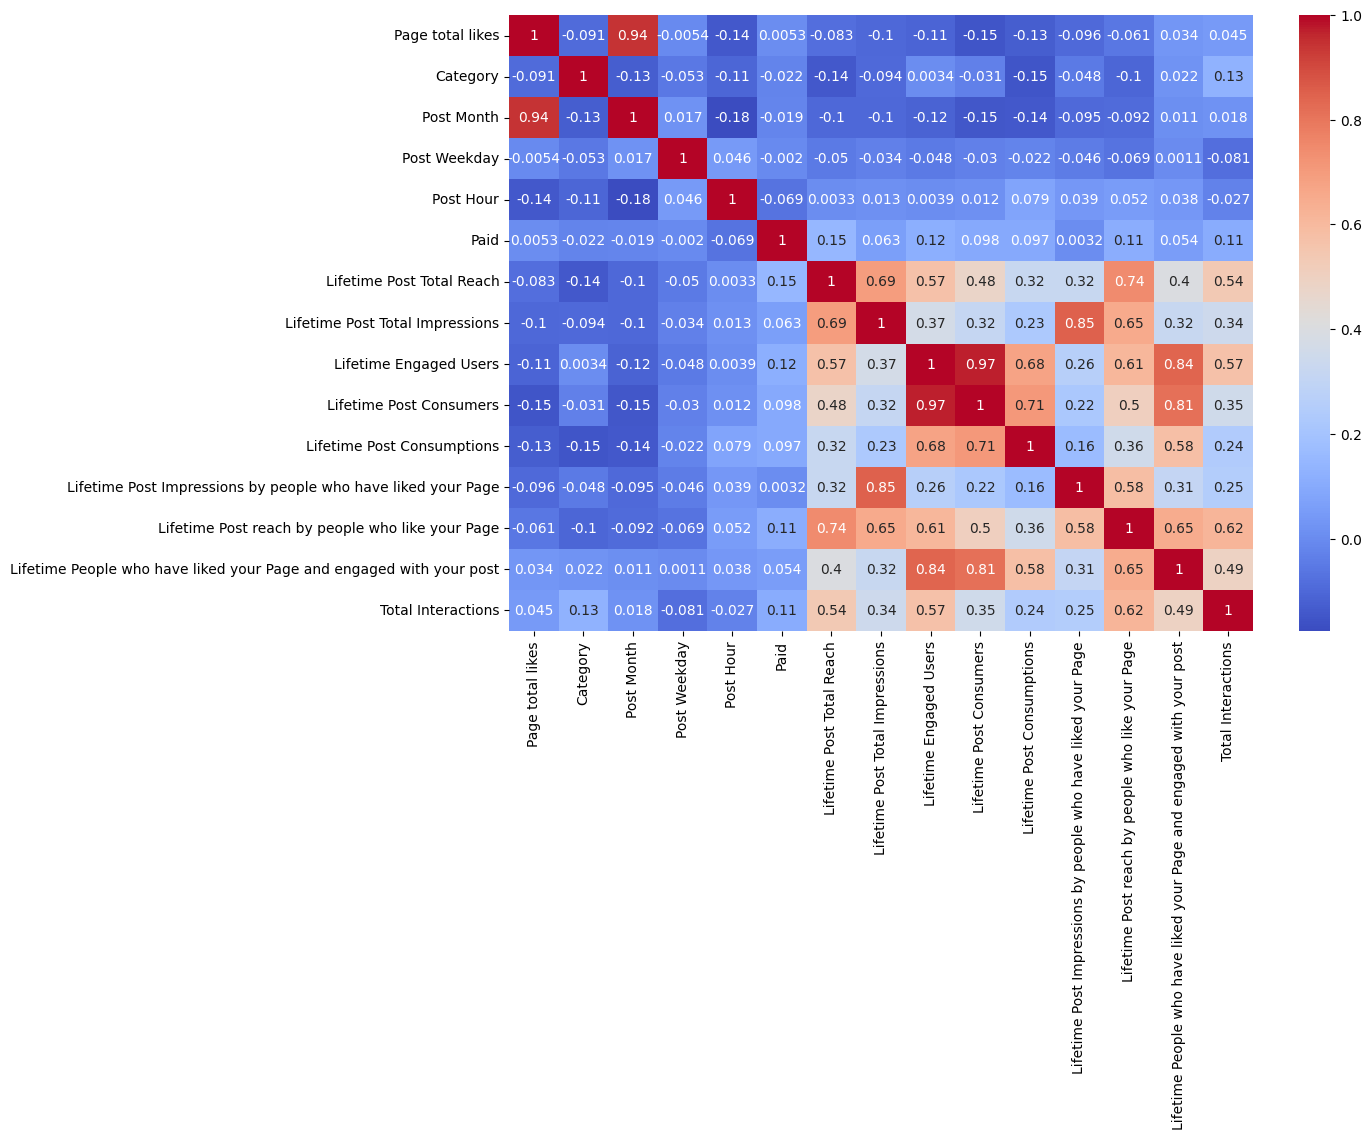

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

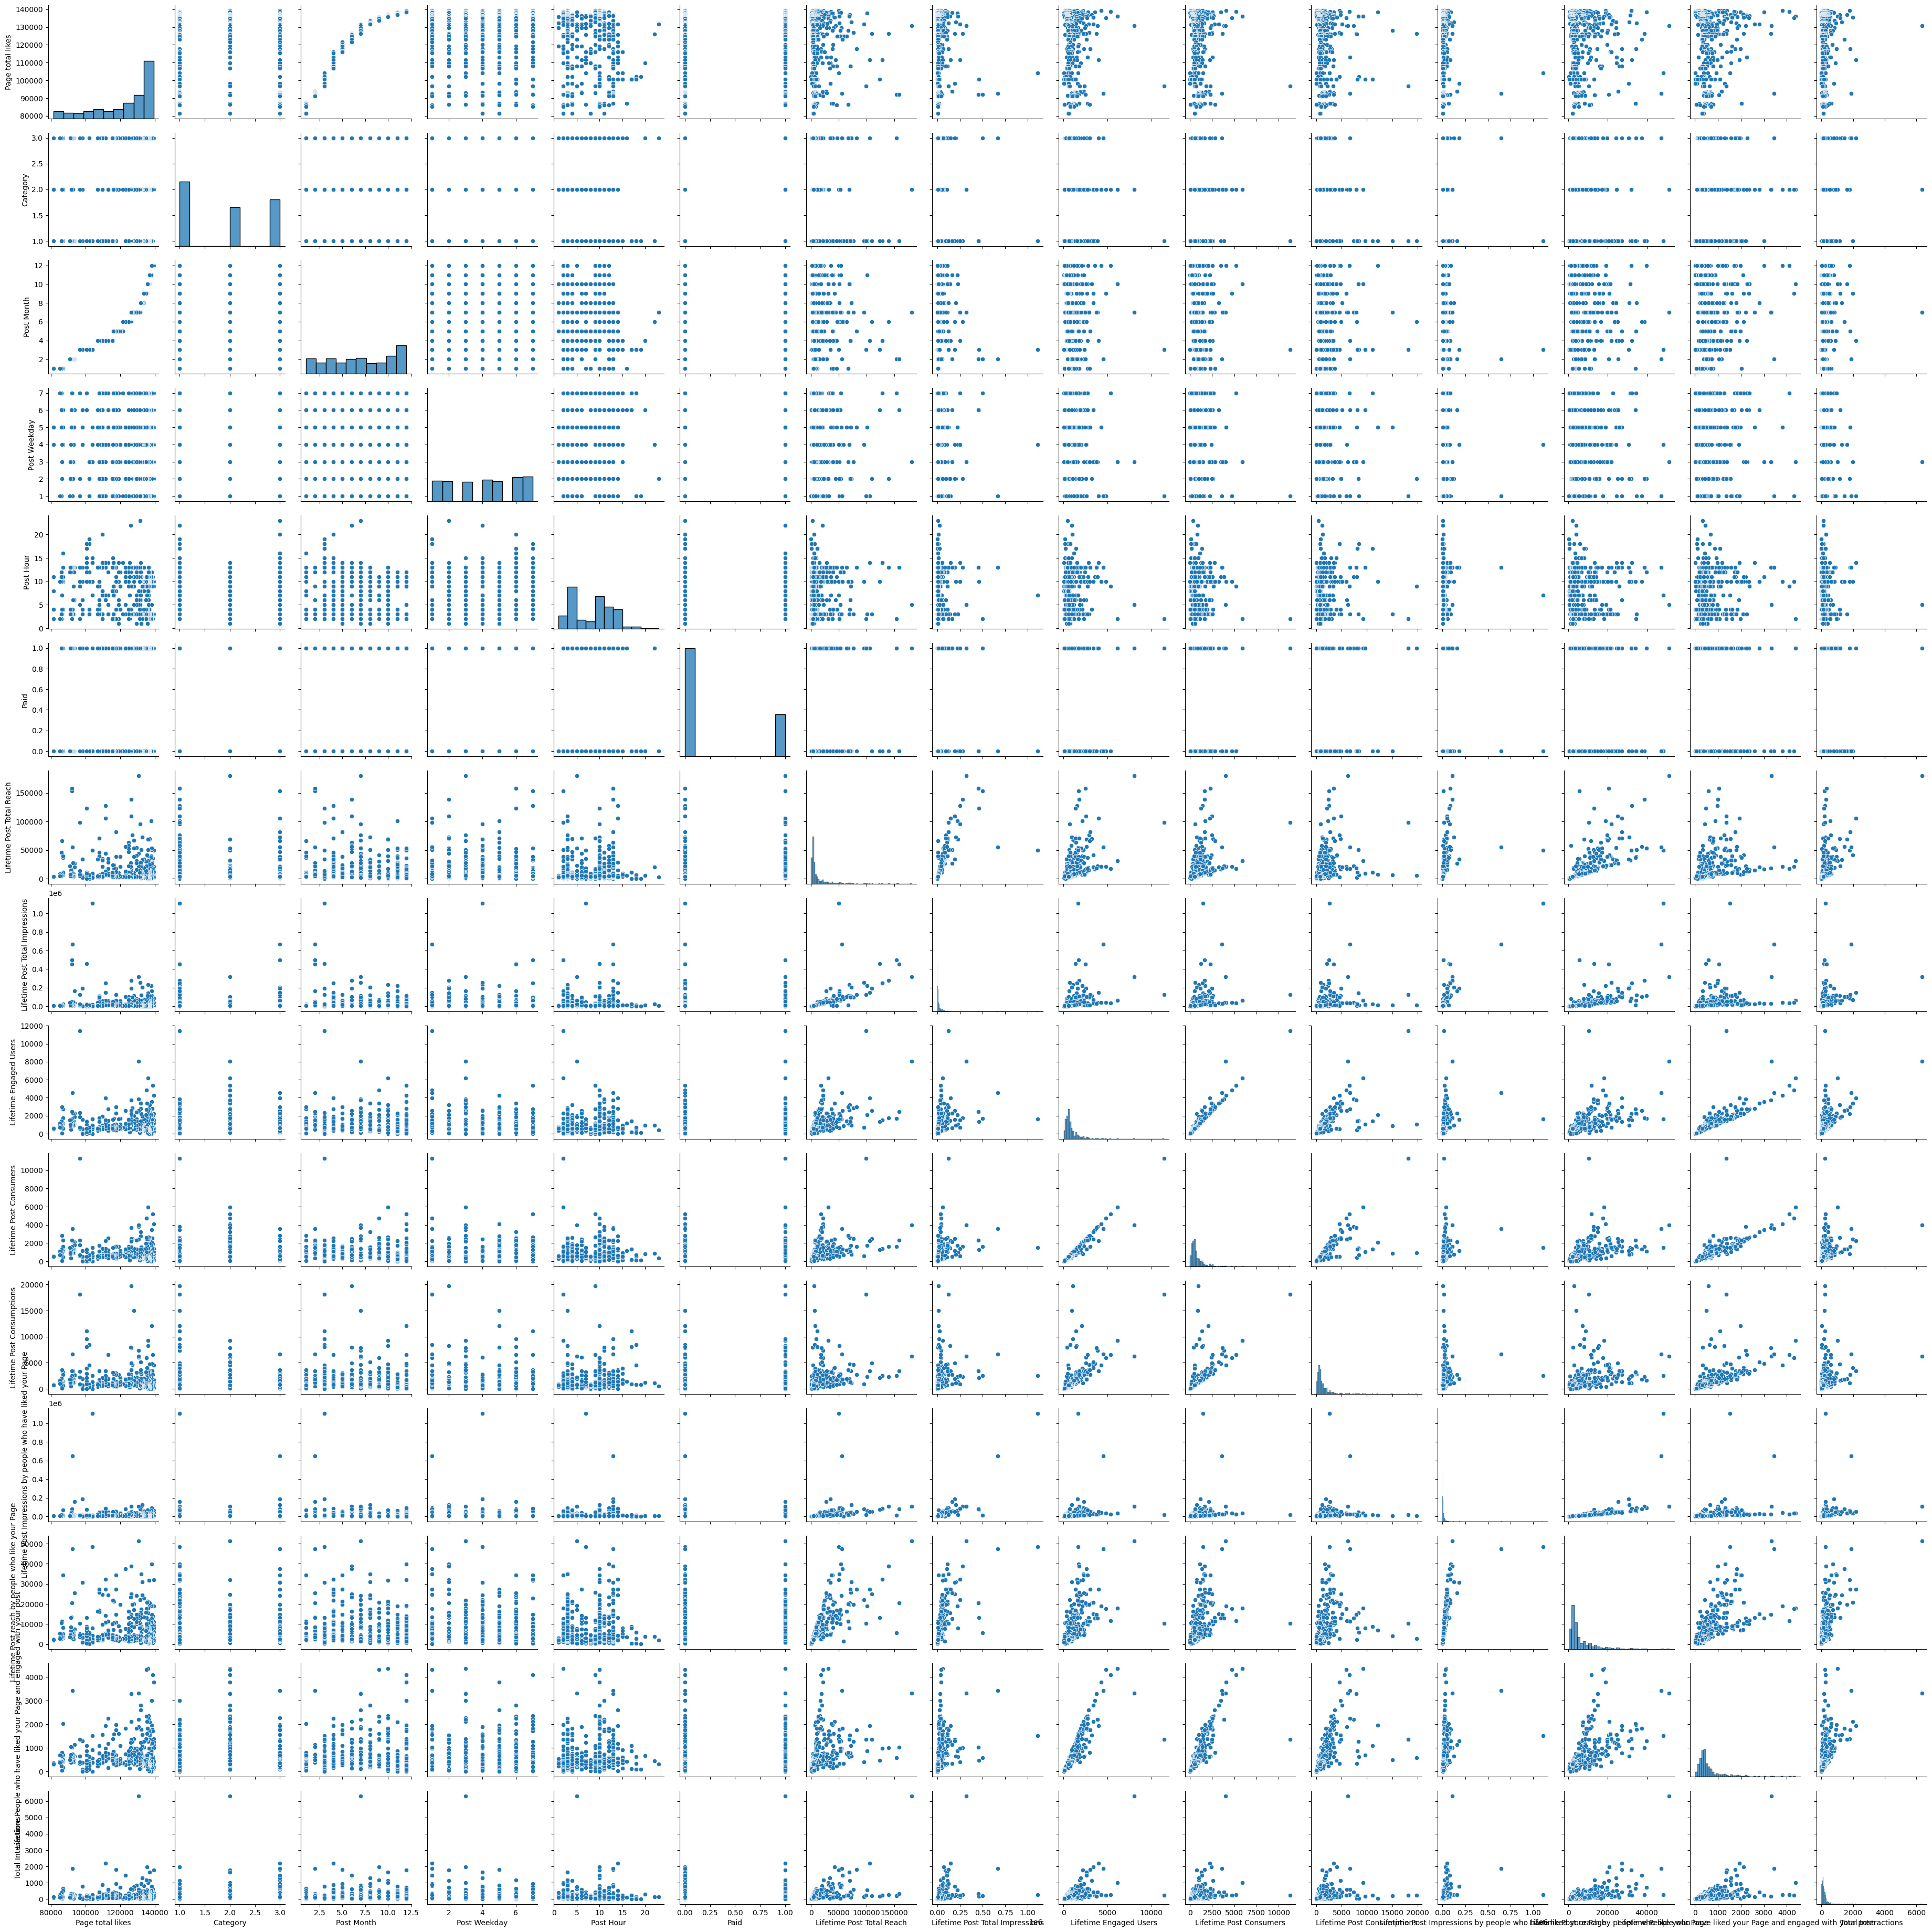

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.columns

Index(['Page total likes', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Total Interactions'],
      dtype='object')

In [ ]:
linear_features=['Lifetime Post Total Reach','Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Total Interactions']

In [ ]:
new_df=df[linear_features]
new_df.head()

,Lifetime Post Total Reach,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Total Interactions
0,2752,109,159,3078,1640,119,100
1,10460,1361,1674,11710,6112,1108,164
2,2413,113,154,2812,1503,132,80
3,50128,790,1119,61027,32048,1386,1777
4,7244,410,580,6228,3200,396,393


In [ ]:
def plot_linear_regression(x, y,feature_name):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    m = numerator / denominator
    c = y_mean - m * x_mean
    plt.scatter(x, y,label='Data points')
    plt.plot(x, m * x + c, color='red', label='Linear regression line')
    plt.xlabel(feature_name)
    plt.ylabel('Total Interactions')
    plt.title(f'Linear Regression: {feature_name} vs Total Interactions')
    plt.legend()
    plt.show()

In [ ]:
f1=new_df['Total Interactions']

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-88-fd6007d4e424>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i is not 'Total Interactions':


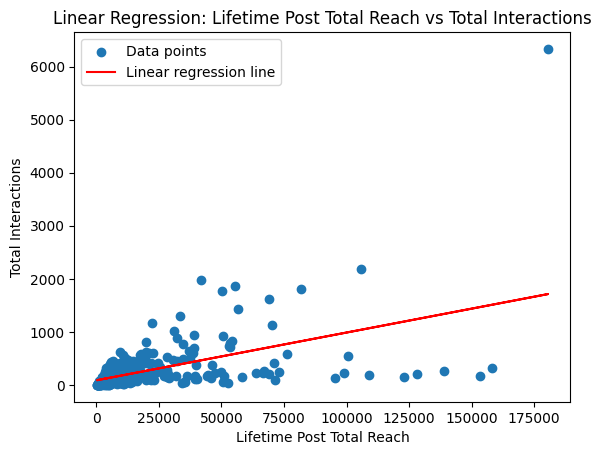

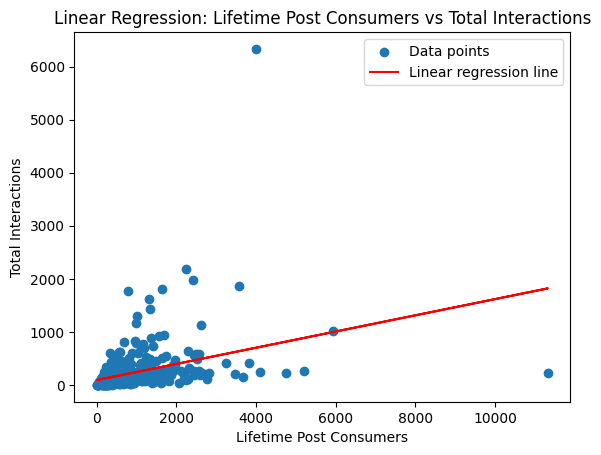

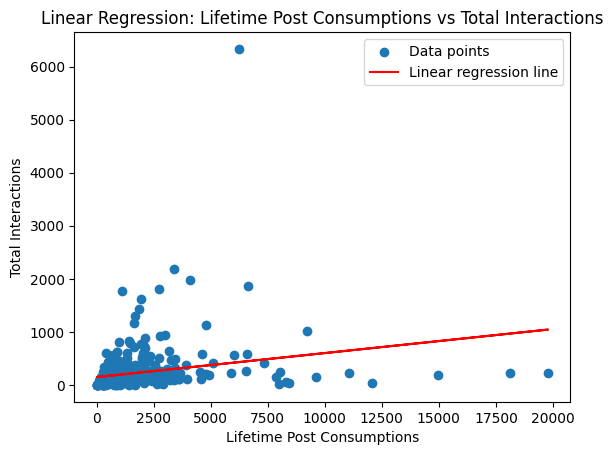

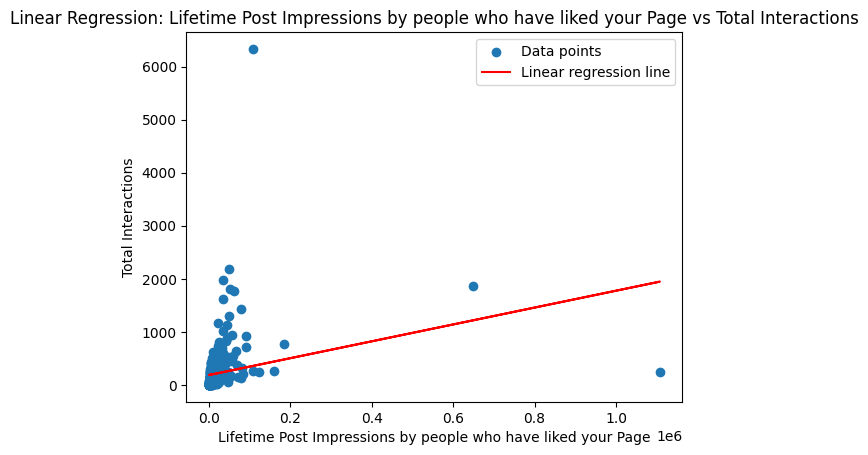

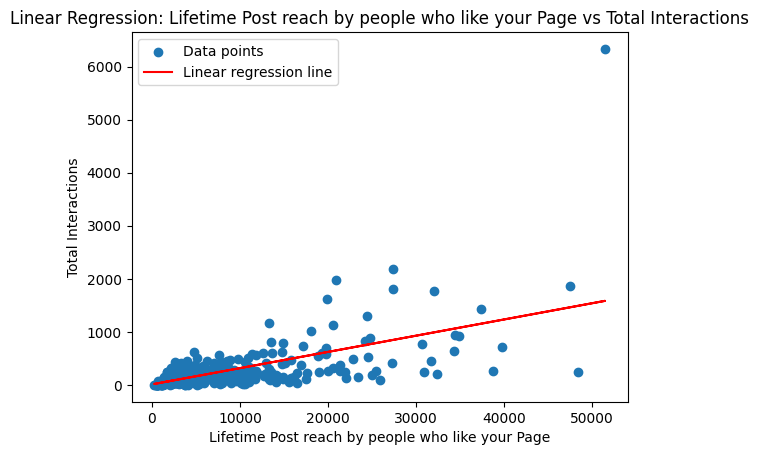

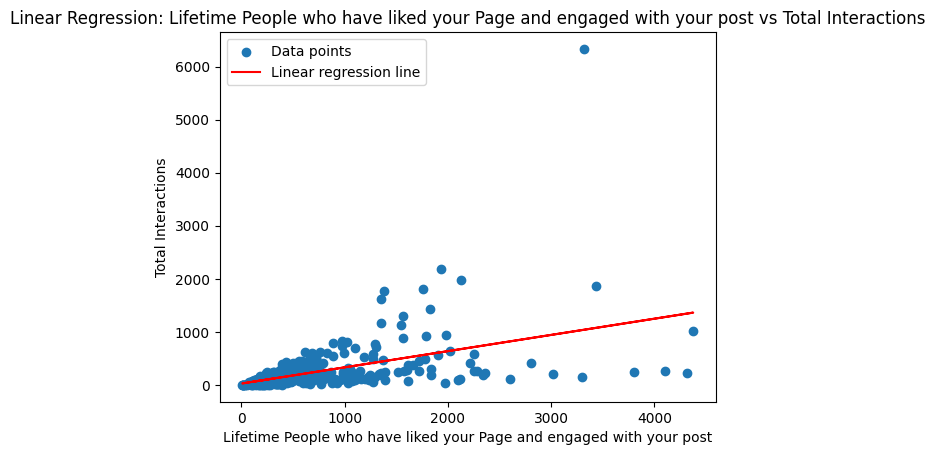

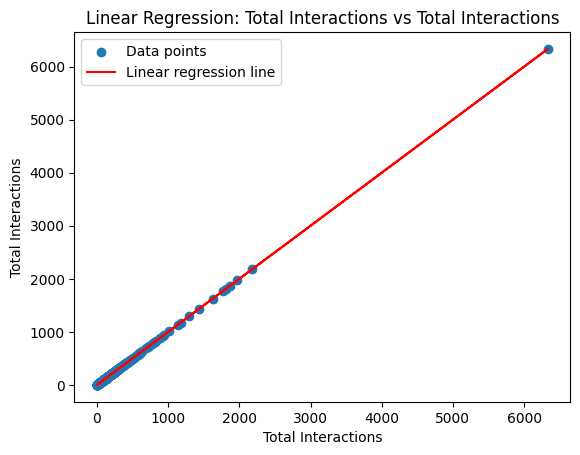

In [ ]:
for i in linear_features:
    if i is not 'Total Interactions':
        f2=new_df[i]
        plot_linear_regression(f2,f1,i)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df.drop(['Total Interactions'],axis=1)
X.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396


In [ ]:
y=df['Total Interactions']
y.head()

,Total Interactions
0,100
1,164
2,80
3,1777
4,393


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
x_train.shape

(350, 14)

In [ ]:
y_train.shape

(350,)

In [ ]:
# ... (Your existing code to load and prepare data) ...

# Drop rows with any missing values in the features (X)
x_train = x_train.dropna()
x_test = x_test.dropna()

# Ensure y_train and y_test are aligned with the dropped rows
y_train = y_train[x_train.index]
y_test = y_test[x_test.index]

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

(150,)

In [ ]:
y_test.shape

(150,)

In [ ]:
x_test.shape

(150, 14)

In [ ]:
def plot_predicted_linear_regression(x,name):
    plt.scatter(x , y_test, color ='red')
    plt.scatter(x , y_pred, color ='blue')
    plt.xlabel(name)
    plt.ylabel('Total Interactions')
    plt.show()

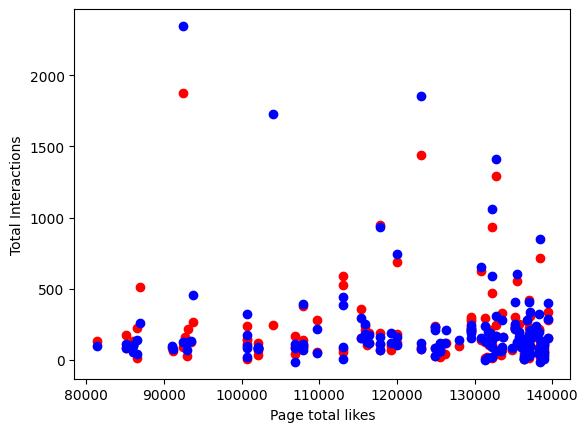

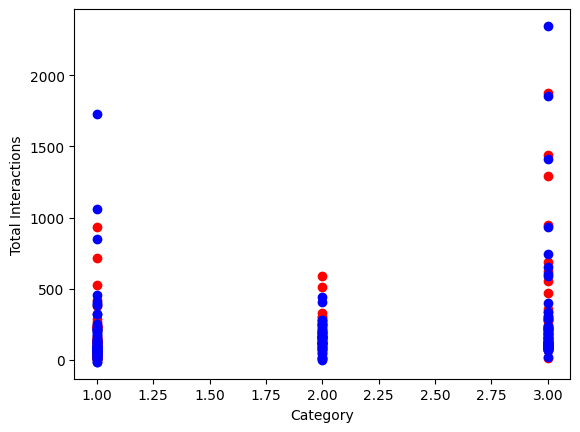

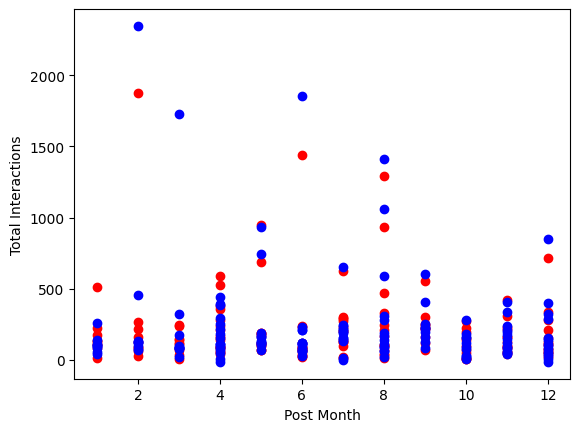

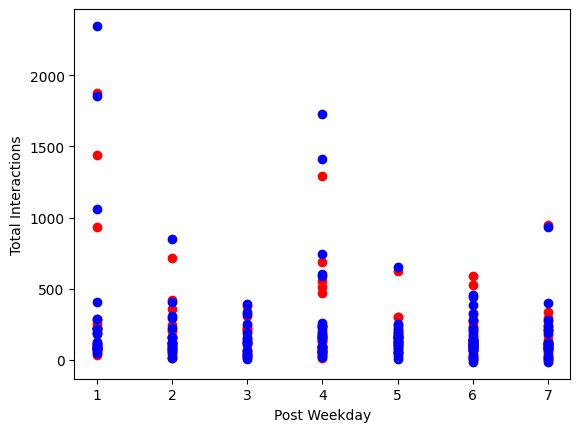

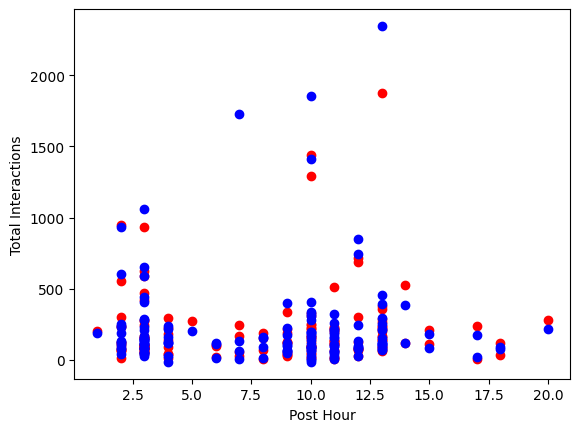

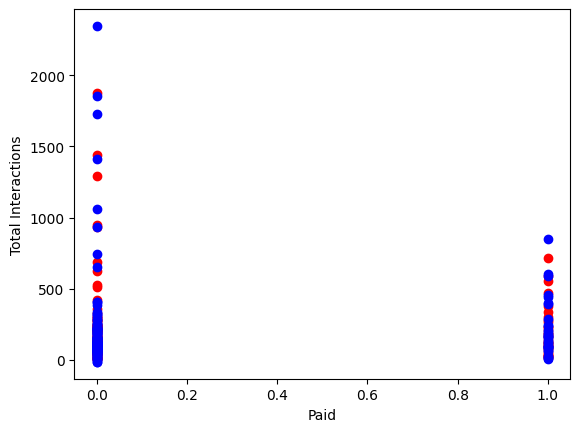

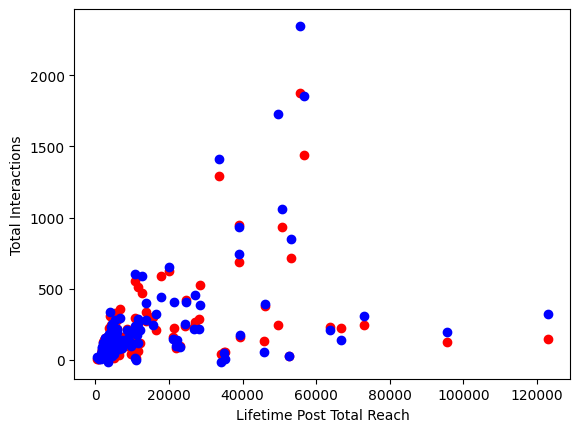

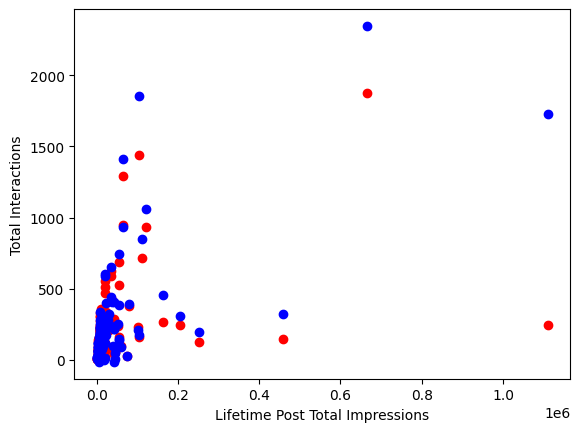

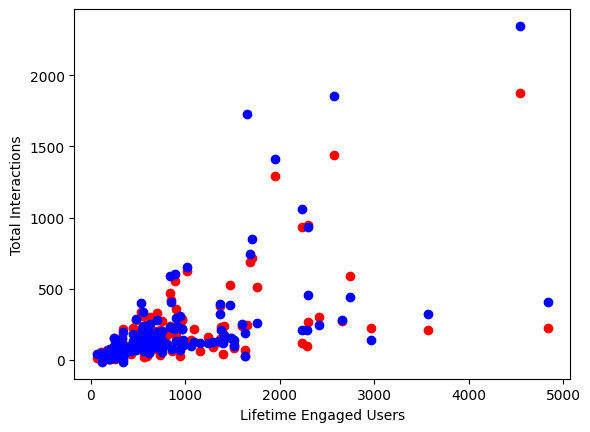

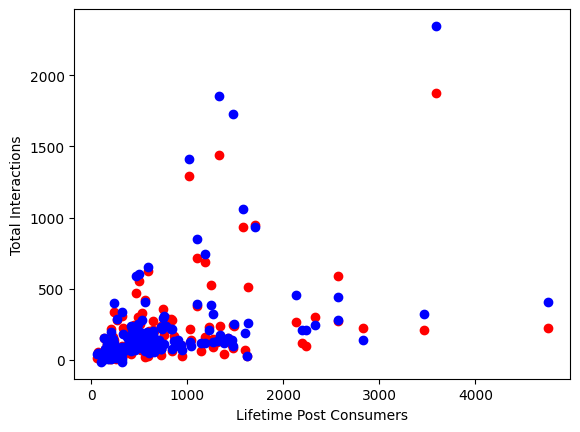

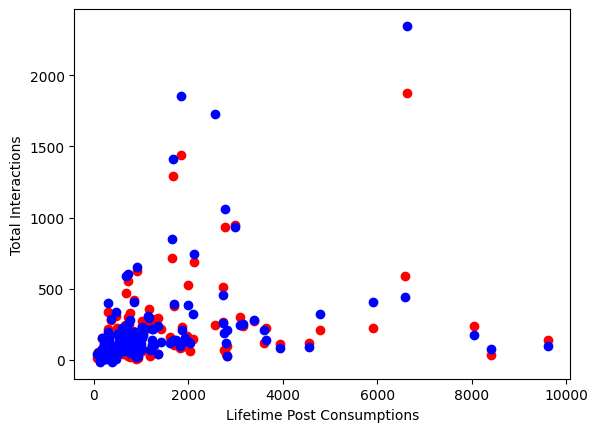

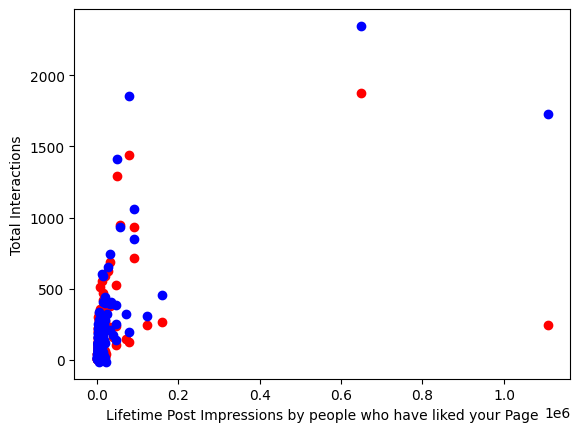

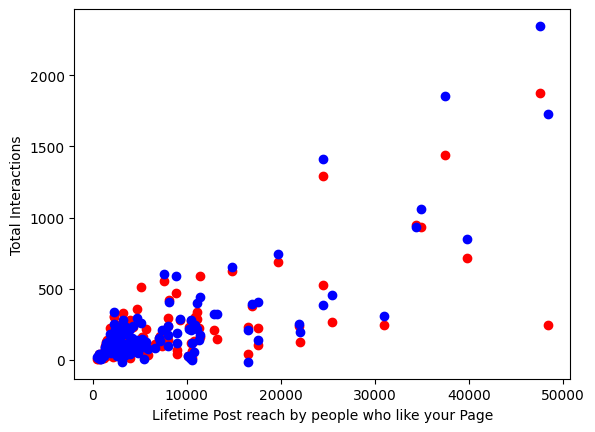

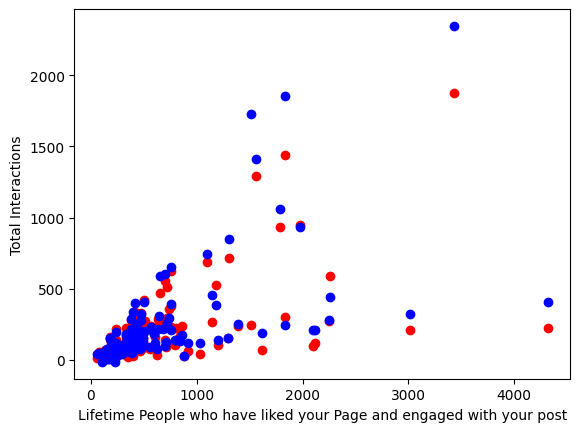

In [ ]:
for i in x_test.columns:
    plot_predicted_linear_regression(x_test[i],i)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = np.sqrt(mse)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 51.505039364555174
MSE: 20250.390259063643
RMSE: 142.3038659315468


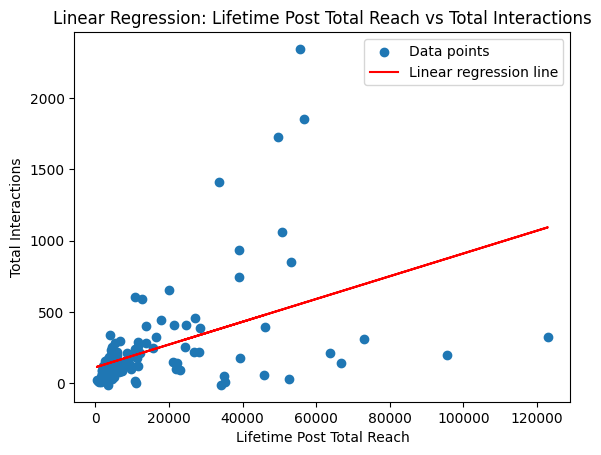

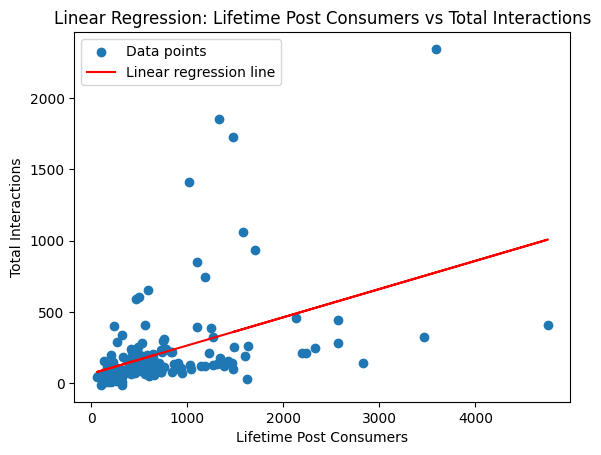

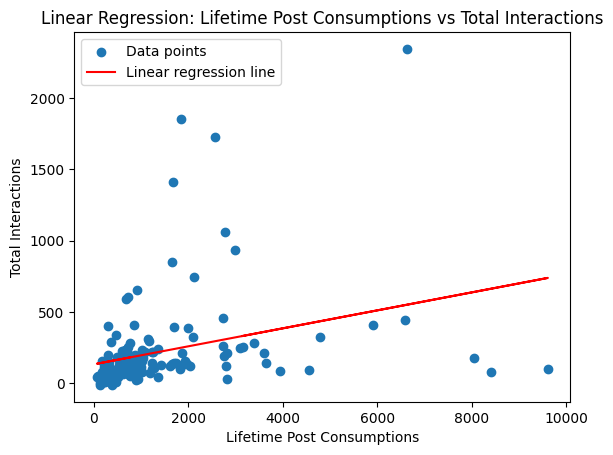

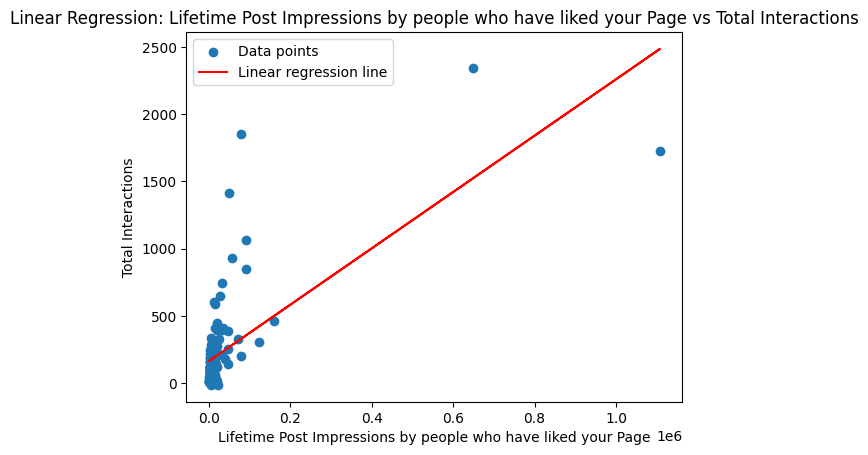

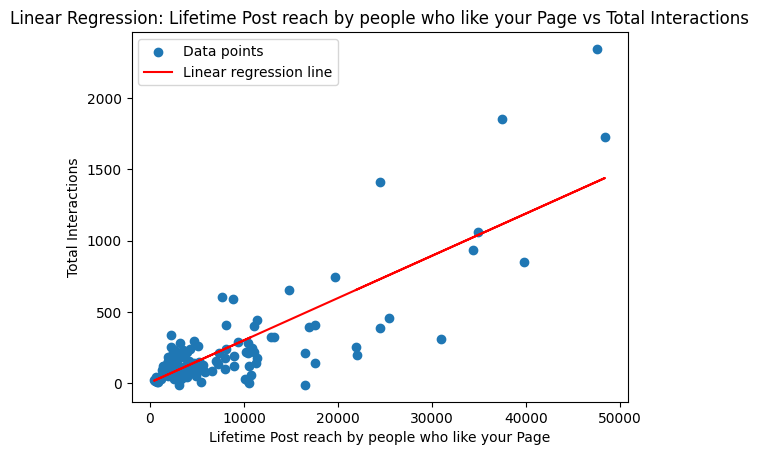

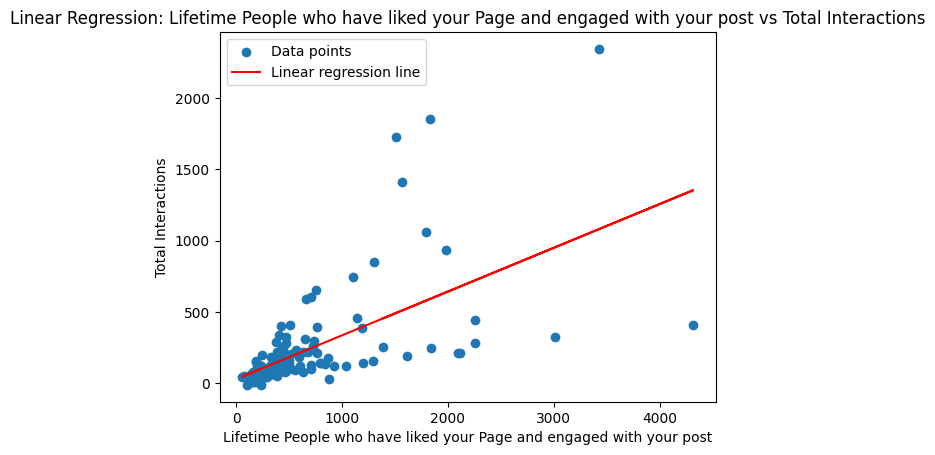

In [ ]:
for i in linear_features:
    if i in x_test.columns:
        f2= x_test[i]
        f1=y_pred
        plot_linear_regression(f2,f1,i)